# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

This notebook shows a simple example of exploring and visualizing the available data in order to predict which passengers where able to the survive the tragedy.

### Import needed packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk

### Read Data

In [2]:
data_frame = pd.read_csv("train.csv")
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


### Understanding The Data

A very important factor that affects making a good data driven decision is to make sure you understand the data you have. So a very basic and important step is to make sure you know what each feature represents. 

<b>PassengerId</b>: An id assigned to each passenger.<br>
<b>Survived</b>: Whether the passenger survived or not.<br>
<b>Pclass</b>: The class the passenger if it's first, second, or third.<br>
<b>Name</b>: The name of the passenger.<br>
<b>Sex</b>: The gender of the passenger if it's male or female.<br>
<b>Age</b>: The age of the passenger.<br>
<b>SibSp</b>: The number of siblings and spouses the passenger had on board.<br>
<b>Parch</b>: The number of parents and children the passenger had on board.<br>
<b>Ticket</b>: The ticket number of the passenger.<br>
<b>Fare</b>: The cost of the ticket.<br>
<b>Cabin</b>: The cabin in which the passenger stayed.<br>
<b>Embarked</b>: Where the passenger boarded the Titanic.<br>

### Reforming Non-numeric Data

Most of basic machine learning techniques does not work on strings. The sklearn package we use in this notebook does not deal with pandas dataframes and require numpy arrays.
In order to achieve that we can get rid of the unnecessary attributes and reform the needed ones in numbers.

In [3]:
data_frame = data_frame.drop(['Embarked','Cabin','Name','Ticket'], axis=1)
data_frame['Sex'] = data_frame['Sex'].map({'female':0,'male':1})

In [4]:
data_frame.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22,1,0,7.2500
1,2,1,1,0,38,1,0,71.2833
2,3,1,3,0,26,0,0,7.9250
3,4,1,1,0,35,1,0,53.1000
4,5,0,3,1,35,0,0,8.0500


### Handling Missing Data

In [5]:
data_frame.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


We can observe that the Age column contain missing data.We can handle this by either adding the mean of the ages or adding the median of the ages or by removing the rows including missing the age attribute.

### Handling Missing Age

We can handle the missing age data by either adding the mean of the ages or adding the median of the ages or by removing the rows including missing the age attribute.
A good wat to have a better guess for the missing data is to consider other factors as the class or the gender

#### Age Distribution by Gender

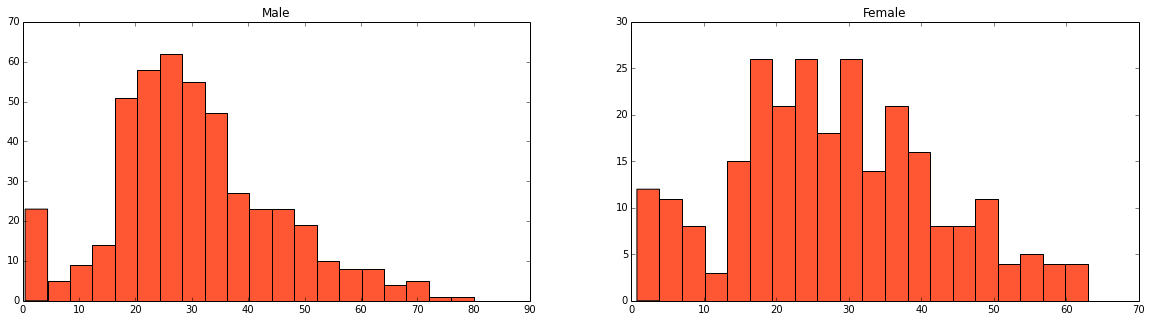

In [10]:
plt.figure(figsize=(20,5))

female_age = data_frame[data_frame['Sex'] == 0]['Age'].dropna().values
male_age = data_frame[data_frame['Sex'] == 1]['Age'].dropna().values

plt.subplot(121)
plt.hist(male_age, bins=20,color='#FF5733')
plt.title('Male')

plt.subplot(122)
plt.hist(female_age,bins=20 , color='#FF5733')
title = plt.title('Female')

#### Age Distribution by Class

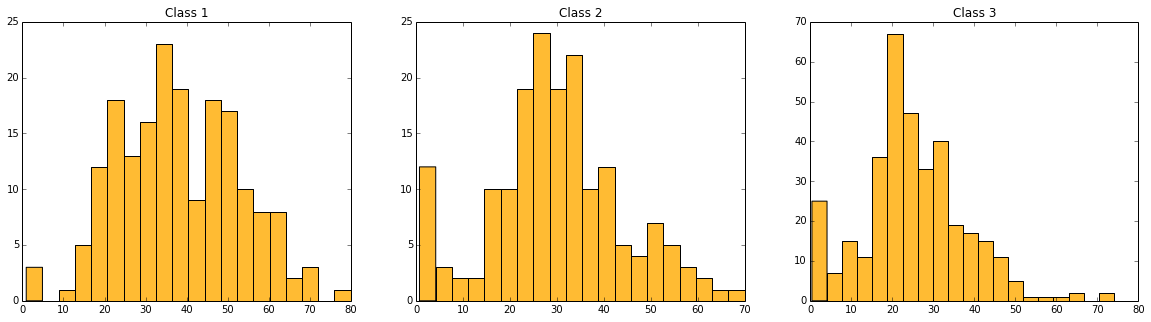

In [11]:
plt.figure(figsize=(20,5))

class1_age = data_frame[data_frame['Pclass'] == 1]['Age'].dropna().values
class2_age = data_frame[data_frame['Pclass'] == 2]['Age'].dropna().values
class3_age = data_frame[data_frame['Pclass'] == 3]['Age'].dropna().values

plt.subplot(131)
plt.hist(class1_age, bins=20 , color ='#FFBB33')
plt.title('Class 1')

plt.subplot(132)
plt.hist(class2_age,bins=20, color ='#FFBB33')
plt.title('Class 2')

plt.subplot(133)
plt.hist(class3_age,bins=20 , color ='#FFBB33')
title = plt.title('Class 3')

#### Age Distribution by Class and Gender

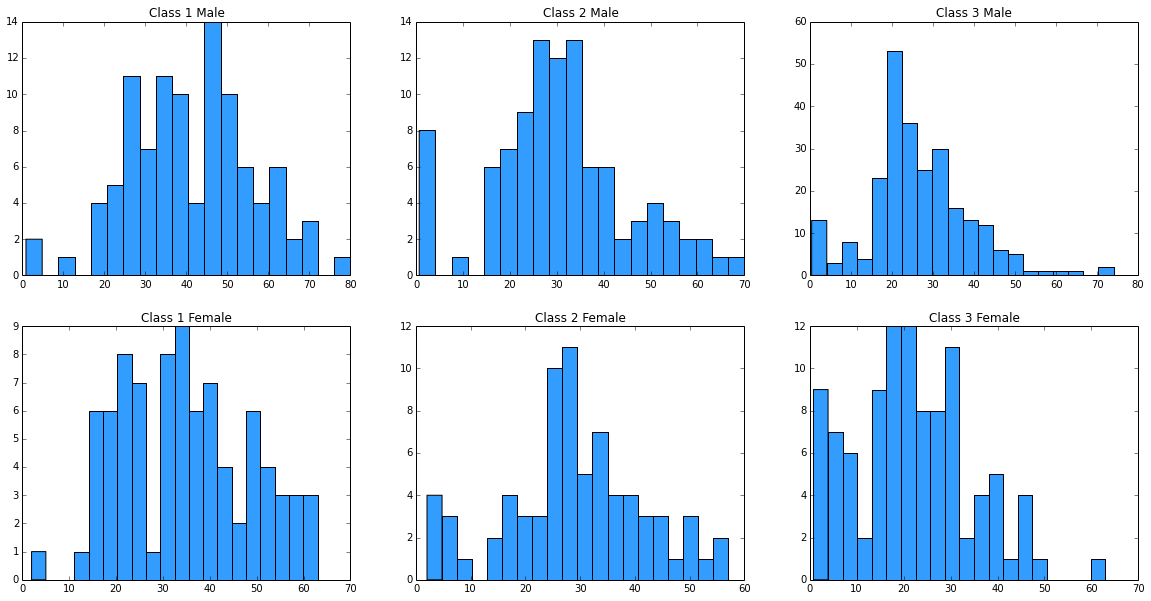

In [13]:
plt.figure(figsize=(20,10))

class1_male_age = data_frame[(data_frame['Pclass'] == 1) & (data_frame['Sex'] == 1)]['Age'].dropna().values
class2_male_age = data_frame[(data_frame['Pclass'] == 2) & (data_frame['Sex'] == 1)]['Age'].dropna().values
class3_male_age = data_frame[(data_frame['Pclass'] == 3) & (data_frame['Sex'] == 1)]['Age'].dropna().values

class1_female_age = data_frame[(data_frame['Pclass'] == 1) & (data_frame['Sex'] == 0)]['Age'].dropna().values
class2_female_age = data_frame[(data_frame['Pclass'] == 2) & (data_frame['Sex'] == 0)]['Age'].dropna().values
class3_female_age = data_frame[(data_frame['Pclass'] == 3) & (data_frame['Sex'] == 0)]['Age'].dropna().values

plt.subplot(231)
plt.hist(class1_male_age, bins=20, color = '#339CFF')
plt.title('Class 1 Male')

plt.subplot(232)
plt.hist(class2_male_age,bins=20, color = '#339CFF')
plt.title('Class 2 Male')

plt.subplot(233)
plt.hist(class3_male_age,bins=20, color = '#339CFF')
plt.title('Class 3 Male')

plt.subplot(234)
plt.hist(class1_female_age, bins=20, color = '#339CFF')
plt.title('Class 1 Female')

plt.subplot(235)
plt.hist(class2_female_age,bins=20, color = '#339CFF')
plt.title('Class 2 Female')

plt.subplot(236)
plt.hist(class3_female_age,bins=20, color = '#339CFF')
title  = plt.title('Class 3 Female')

We can obsereve from the previous plots that the age distribution is different for each gender in each class. So instead of filling the missing age with the global mean or a median, a customized mean for each gender in each class might be a good guess.

#### Filling the Missing Data

Calculating the Median.

In [14]:
"""
    2 rows for Gender and 3 columns for Class
"""
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = data_frame[(data_frame['Sex'] == i) & \
                              (data_frame['Pclass'] == j+1)]['Age'].dropna().median()
 
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [15]:
for i in range(0, 2):
    for j in range(0, 3):
        data_frame.loc[ (data_frame.Age.isnull()) & (data_frame.Sex == i) & (data_frame.Pclass == j+1),\
                'Age'] = median_ages[i,j]

In [16]:
data_frame.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


## Exploring Data through Visualization

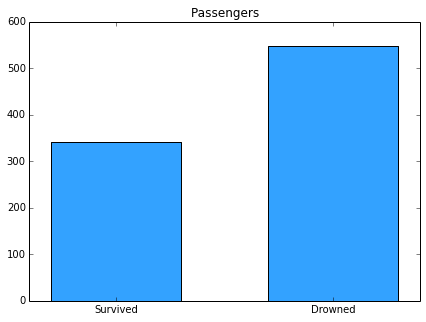

In [17]:
plt.figure(figsize=(7,5))
survived_count = len(data_frame[data_frame['Survived'] == 1])
drowned_count = len(data_frame[data_frame['Survived'] == 0])
labels = ['Survived', 'Drowned']

plt.bar([1,2],[survived_count,drowned_count],0.6, color='#33A2FF', align='center')
ticks = plt.xticks([1,2], labels)
title  = plt.title('Passengers ')

#### Surviving through Age , Gender and Class 

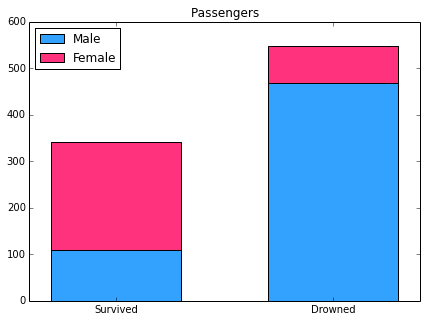

In [20]:
plt.figure(figsize=(7,5))

survived = data_frame[data_frame['Survived'] == 1]
drowned = data_frame[data_frame['Survived'] == 0]

survived_male = len(survived[survived['Sex'] == 1])
survived_female = len(survived[survived['Sex'] == 0])

drowned_male = len(drowned[drowned['Sex'] == 1])
drowned_female = len(drowned[drowned['Sex'] == 0])

male_bars = plt.bar([1,2], [survived_male , drowned_male], 0.6, color='#33A2FF', align='center')
female_bars = plt.bar([1,2], [survived_female , drowned_female], 0.6, color='#FF337D',bottom=[survived_male , drowned_male], align='center')

ticks = plt.xticks([1,2], labels)
plot  = plt.legend([male_bars, female_bars], ['Male', 'Female'],loc=2)
title = plt.title('Passengers ')

Histogram of the ages of the survivors

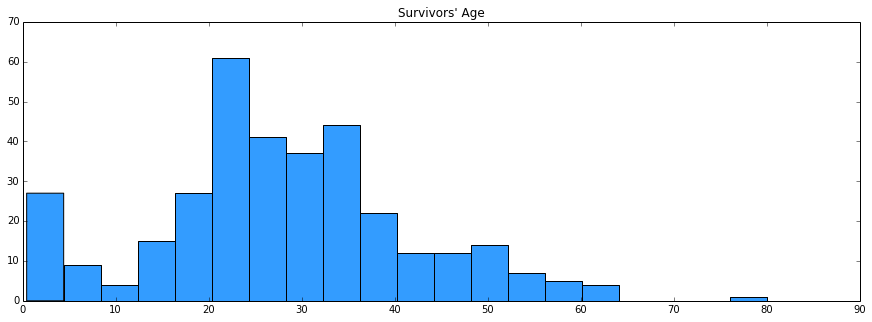

In [23]:
plt.figure(figsize=(15,5))
survived_ages_histogram_data = data_frame[data_frame['Survived'] ==1]['Age'].values
plt.title('Survivors\' Age')
plot = plt.hist(survived_ages_histogram_data,bins=20, color = '#339CFF')

The Passengers by class

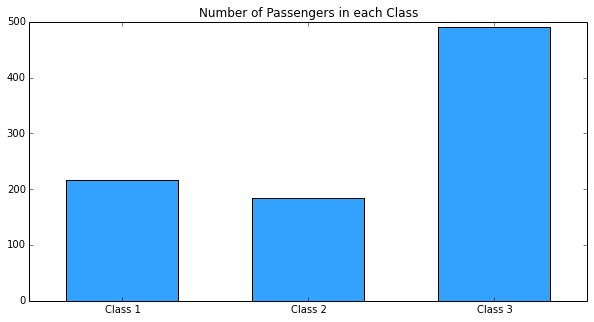

In [24]:
plt.figure(figsize=(10,5))
data_class1_count = len(data_frame[data_frame['Pclass'] == 1])
data_class2_count = len(data_frame[data_frame['Pclass'] == 2])
data_class3_count = len(data_frame[data_frame['Pclass'] == 3])

labels = ['Class 1', 'Class 2' , 'Class 3']

plt.bar([1,2,3],[data_class1_count,data_class2_count,data_class3_count],0.6, color='#33A2FF', align='center')
plt.title('Number of Passengers in each Class')
ticks = plt.xticks([1,2,3], labels)

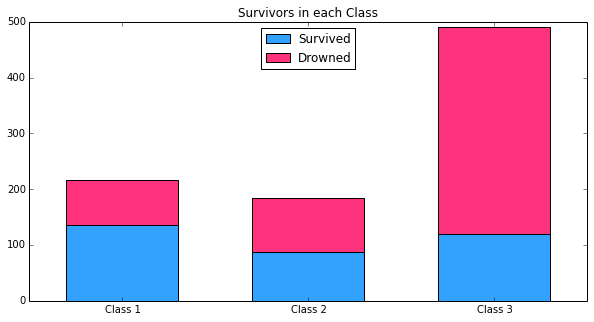

In [25]:
plt.figure(figsize=(10,5))

data_survived = data_frame[data_frame['Survived'] == 1]
survived_class1_count = len(data_survived[data_survived['Pclass'] == 1])
survived_class2_count = len(data_survived[data_survived['Pclass'] == 2])
survived_class3_count = len(data_survived[data_survived['Pclass'] == 3])

data_drowned = data_frame[data_frame['Survived'] == 0]
drowned_class1_count = len(data_drowned[data_drowned['Pclass'] == 1])
drowned_class2_count = len(data_drowned[data_drowned['Pclass'] == 2])
drowned_class3_count = len(data_drowned[data_drowned['Pclass'] == 3])


survived_bars = plt.bar([1,2,3], [survived_class1_count , survived_class2_count,survived_class3_count], 0.6, color='#33A2FF', align='center')
drowned_bars = plt.bar([1,2,3], [drowned_class1_count , drowned_class2_count,drowned_class3_count], 0.6, color='#FF337D',
                      bottom=[survived_class1_count , survived_class2_count,survived_class3_count], align='center')

labels = ['Class 1', 'Class 2' , 'Class 3']
ticks = plt.xticks([1,2,3], labels)
plt.title('Survivors in each Class')
plot  = plt.legend([survived_bars, drowned_bars], ['Survived', 'Drowned'],loc=9)

The Passengers by class and gender

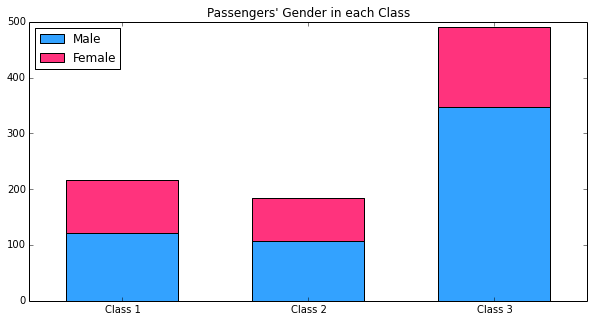

In [26]:
plt.figure(figsize=(10,5))

class1_data = data_frame[data_frame['Pclass'] == 1]
class2_data = data_frame[data_frame['Pclass'] == 2]
class3_data = data_frame[data_frame['Pclass'] == 3]

class1_male = len(class1_data[class1_data['Sex'] == 1])
class1_female = len(class1_data[class1_data['Sex'] == 0])

class2_male = len(class2_data[class2_data['Sex'] == 1])
class2_female = len(class2_data[class2_data['Sex'] == 0])

class3_male = len(class3_data[class3_data['Sex'] == 1])
class3_female = len(class3_data[class3_data['Sex'] == 0])

male_bars = plt.bar([1,2,3], [class1_male , class2_male,class3_male], 0.6, color='#33A2FF', align='center')
female_bars = plt.bar([1,2,3], [class1_female , class2_female,class3_female], 0.6, color='#FF337D',
                      bottom=[class1_male , class2_male,class3_male], align='center')

labels = ['Class 1', 'Class 2' , 'Class 3']
ticks = plt.xticks([1,2,3], labels)
plt.title('Passengers\' Gender in each Class')
plot  = plt.legend([male_bars, female_bars], ['Male', 'Female'],loc=2)


The survivors by class and gender

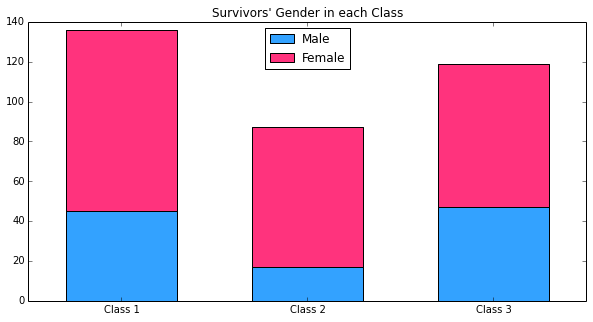

In [27]:
plt.figure(figsize=(10,5))

data_survived = data_frame[data_frame['Survived'] == 1]

class1_data = data_survived[data_survived['Pclass'] == 1]
class2_data = data_survived[data_survived['Pclass'] == 2]
class3_data = data_survived[data_survived['Pclass'] == 3]

class1_male = len(class1_data[class1_data['Sex'] == 1])
class1_female = len(class1_data[class1_data['Sex'] == 0])

class2_male = len(class2_data[class2_data['Sex'] == 1])
class2_female = len(class2_data[class2_data['Sex'] == 0])

class3_male = len(class3_data[class3_data['Sex'] == 1])
class3_female = len(class3_data[class3_data['Sex'] == 0])

male_bars = plt.bar([1,2,3], [class1_male , class2_male,class3_male], 0.6, color='#33A2FF', align='center')
female_bars = plt.bar([1,2,3], [class1_female , class2_female,class3_female], 0.6, color='#FF337D',
                      bottom=[class1_male , class2_male,class3_male], align='center')

labels = ['Class 1', 'Class 2' , 'Class 3']
ticks = plt.xticks([1,2,3], labels)
plt.title('Survivors\' Gender in each Class')
plot  = plt.legend([male_bars, female_bars], ['Male', 'Female'],loc=9)

## Prediction using Sklearn

Sklearn doesn't deal with Pandas dataframes so we have to convert the dataframes to numpy arrays

In [28]:
data_frame.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22,1,0,7.2500
1,2,1,1,0,38,1,0,71.2833
2,3,1,3,0,26,0,0,7.9250
3,4,1,1,0,35,1,0,53.1000
4,5,0,3,1,35,0,0,8.0500


In [29]:
data = data_frame.drop(['PassengerId','Survived'],axis=1).values
labels = data_frame['Survived'].values

Divide the data into train and test

In [30]:
from sklearn import cross_validation
train_data, test_data, train_labels, test_labels =cross_validation.train_test_split(data, labels, test_size=0.2, random_state=0)

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit(train_data,train_labels)
output = forest.predict(test_data)
accuracy_score(test_labels,output)

0.82681564245810057

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log = log.fit(train_data,train_labels)
output2 = log.predict(test_data)
accuracy_score(test_labels,output2)

0.79329608938547491

### Effect of Adding New features on Accuracy

We can add new features using simple calculations.

In [33]:
data_frame.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22,1,0,7.2500
1,2,1,1,0,38,1,0,71.2833
2,3,1,3,0,26,0,0,7.9250
3,4,1,1,0,35,1,0,53.1000
4,5,0,3,1,35,0,0,8.0500


In [34]:
data_frame['ClassAge'] = data_frame['Age'] * data_frame['Pclass']
data_frame.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,ClassAge
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.112424,0.523008,0.381594,32.204208,62.614860
std,257.353842,0.486592,0.836071,0.477990,13.304424,1.102743,0.806057,49.693429,31.362024
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.920000
25%,223.500000,0.000000,2.000000,0.000000,21.500000,0.000000,0.000000,7.910400,40.000000
50%,446.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,63.000000
75%,668.500000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,75.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,222.000000


In [35]:
data = data_frame.drop(['PassengerId','Survived'],axis=1).values
labels = data_frame['Survived'].values
from sklearn import cross_validation
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, labels, test_size=0.2, random_state=0)

#### Random Forest Prediction

In [36]:
forest_fe = RandomForestClassifier(n_estimators = 100)
forest_fe = forest.fit(train_data,train_labels)
output_fe = forest.predict(test_data)
accuracy_score(test_labels,output_fe)

0.82681564245810057

The added feature did not help improving our classifier 